In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [32]:
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/Data_Supervised_Train.csv')


In [33]:
df

,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5,y6,y7,z1,Label
0,1.590909,1.309677,0.681883,1.257692,0.875399,0.226982,0.269745,0.193618,0.226483,0.180053,0.846449,1.000000,141,1.962617
1,0.445946,0.743191,0.822485,1.516667,0.000000,0.222493,0.440044,1.000000,0.372562,0.375142,0.185275,1.000000,85,0.819149
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,130,0.200000
3,0.256256,0.914706,0.885813,0.538000,1.020833,0.057722,0.971121,0.590277,0.257112,1.000000,0.466863,0.971121,65,1.103734
4,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,76,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984669,1.000000,1.000000,1.000000,0.930233,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,85,1.000000
984670,0.445946,0.743191,0.822485,1.516667,0.000000,0.233542,0.445090,1.000000,0.375568,0.319932,0.200938,1.000000,85,1.530337
984671,1.021148,0.793706,0.608696,1.565789,0.933333,0.017206,0.118331,0.046499,0.057781,0.033065,1.000000,0.046499,108,0.847059
984672,0.000000,0.819149,0.000000,2.128655,1.011223,0.919467,0.792109,0.810191,0.546131,0.938481,0.857458,1.000000,154,0.829401


In [45]:
inf_indices = np.where(np.isinf(df))

# print the indices
print(inf_indices)

(array([   858,    858,    858, ..., 983606, 983925, 983925]), array([5, 6, 7, ..., 8, 5, 7]))


In [46]:
df[858]

KeyError: ignored

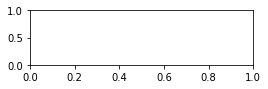

In [52]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
mean = df.median()
df.fillna(mean, inplace=True)

In [53]:
for column in df.columns:
    print(f"Column {column}: {np.isinf(df[column]).any()}")

Column x1: False
Column x2: False
Column x3: False
Column x4: False
Column x5: False
Column y1: False
Column y2: False
Column y3: False
Column y4: False
Column y5: False
Column y6: False
Column y7: False
Column z1: False
Column Label: False


In [17]:
import pandas as pd

# Load the data into a pandas DataFrame

# Store the label columns
label_columns = [col for col in df.columns if col.startswith("Label")]

# Store the data columns to be scaled
data_columns = [col for col in df.columns if col not in label_columns]

# Scale the data columns using Min-Max Scaling
df[data_columns] = (df[data_columns] - df[data_columns].min()) / (df[data_columns].max() - df[data_columns].min())

# Store the scaled data in the DataFrame
df = df[data_columns + label_columns]


In [19]:
df['y1']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
984669    0.0
984670    0.0
984671    0.0
984672    0.0
984673    0.0
Name: y1, Length: 984674, dtype: float64

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data into a Pandas DataFrame


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = df.drop("Label", axis=1)
y = df["Label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target for the test data
y_pred = model.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: ignored

In [31]:
import pandas as pd
import numpy as np

# Load data into a pandas DataFrame

# Replace NaN, infinity, or too large values with the mean value of the column
df = df.replace([np.inf, -np.inf], np.nan)
df.fillna(df.mean(), inplace=True)

# Perform Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop("Label", axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled["Label"] = df["Label"]

ValueError: ignored

In [ ]:
np.isinf(df).any()


Unnamed: 0    False
Index         False
A             False
B             False
C             False
D             False
E             False
F             False
G             False
Label         False
dtype: bool

In [ ]:
df= df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [ ]:
df

,Unnamed: 0,Index,A,B,C,D,E,F,G,Label
0,0,0,0.440845,0.476744,2.240530,1.942197,0.698276,-9.164233e-04,65,0.773585
1,1,1,0.412935,1.236000,1.219008,0.931894,0.725352,2.777778e+00,226,3.683036
2,2,2,0.822485,1.516667,1.285714,0.600000,0.000000,2.933490e+01,127,0.681883
3,3,3,2.370909,0.679612,0.623762,1.285714,1.041509,3.356123e-05,85,0.829268
4,4,4,1.000000,0.523132,1.000000,1.000000,1.000000,1.797693e+308,107,1.000000
...,...,...,...,...,...,...,...,...,...,...
999995,999995,999995,1.000000,1.000000,1.000000,1.000000,1.000000,1.797693e+308,65,1.000000
999996,999996,999996,1.273973,1.418182,0.828627,0.820878,0.952381,2.297693e-01,141,0.888372
999997,999997,999997,1.000000,1.000000,1.000000,1.000000,1.000000,1.797693e+308,130,1.000000
999998,999998,999998,1.176829,0.952941,0.810526,1.080000,0.797778,1.546431e+00,127,1.073171
